In [1]:
import pandas as pd
df = pd.read_csv('turmas-2017.1.csv' , sep = ';')
fmc_1 = df[(df.codigo == "IMD0028")]
fmc_2 = df[(df.codigo == "IMD0038")]
fmc_2 = fmc_2[0:2]
prob = df[(df.codigo == "IMD0033")]
fmc_1.head()

,id_turma,codigo,nome_ascii,docente_interno,docente_externo,nivel_ensino,ano,periodo,capacidade_aluno,local,...,distancia,tipo,data_consolidacao,agrupadora,qtd_aulas_lancadas,situacao_turma,convenio,modalidade_participantes,campus_turma,Unnamed: 24
5570,57597592,IMD0028,FUNDAMENTOS MATEMATICOS DA COMPUTACAO I,014ec19f7505af82a85fd57100dc4807,NaN,GRADUAÇÃO,2017,1,73.0,A306 - CIVT,...,f,1,2017-07-07 17:40:45.318,f,108.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN
5571,57597593,IMD0028,FUNDAMENTOS MATEMATICOS DA COMPUTACAO I,7566efce6246d381c7a74eaaf02726c1,NaN,GRADUAÇÃO,2017,1,60.0,A306 - CIVT,...,f,1,NaN,f,NaN,EXCLUÍDA,NaN,Presencial,Campus Central,NaN
5572,57597594,IMD0028,FUNDAMENTOS MATEMATICOS DA COMPUTACAO I,7566efce6246d381c7a74eaaf02726c1,NaN,GRADUAÇÃO,2017,1,60.0,A306 - CIVT,...,f,1,NaN,f,NaN,EXCLUÍDA,NaN,Presencial,Campus Central,NaN
9870,57600129,IMD0028,FUNDAMENTOS MATEMATICOS DA COMPUTACAO I,6040a6c8488f5274cd2898440646afc0,NaN,GRADUAÇÃO,2017,1,72.0,CIVT - A306,...,f,1,2017-07-07 18:40:36.511,f,104.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN
9871,57600130,IMD0028,FUNDAMENTOS MATEMATICOS DA COMPUTACAO I,117eb3d847f2ecfebf4034714b820ffa,NaN,GRADUAÇÃO,2017,1,71.0,CIVT - A306,...,f,1,2017-07-07 03:21:38.012,f,98.0,CONSOLIDADA,NaN,Presencial,Campus Central,NaN


In [3]:
id_turma_fmc_1=fmc_1.id_turma.tolist()
id_turma_fmc_2=fmc_2.id_turma.tolist()
id_turma_prob=prob.id_turma.tolist()

matricula = pd.read_csv('matricula-componente-20171.csv', sep = ';')
## Data-Frame turmas de fmc1
turmas_fmc_1 = matricula[matricula.id_turma == id_turma_fmc_1[0]] 
##print(turmas_fmc_1)
for i in range (1, len(id_turma_fmc_1)):
    ##print (matricula[matricula.id_turma == id_turma_fmc_1[i]])
    temp = matricula[matricula.id_turma == id_turma_fmc_1[i]]
    turmas_fmc_1 = pd.concat([turmas_fmc_1, temp])
## tirando nan
turmas_fmc_1 = turmas_fmc_1.dropna(axis=0, how='any')
turmas_fmc_1 = turmas_fmc_1.dropna(axis=1, how='any')
turmas_fmc_1_unidade_1 = turmas_fmc_1[turmas_fmc_1.unidade == 1]
turmas_fmc_1_unidade_2 = turmas_fmc_1[turmas_fmc_1.unidade == 2]
turmas_fmc_1_unidade_3 = turmas_fmc_1[turmas_fmc_1.unidade == 3]
##print (turmas_fmc_1)

## Data-Frame turmas de fmc2
turmas_fmc_2 = matricula[matricula.id_turma == id_turma_fmc_2[0]] 
##print(turmas_fmc_2)
for i in range (1, len(id_turma_fmc_2)):
    ##print (matricula[matricula.id_turma == id_turma_fmc_1[i]])
    temp = matricula[matricula.id_turma == id_turma_fmc_1[i]]
    turmas_fmc_2 = pd.concat([turmas_fmc_2, temp])
## tirando nan
turmas_fmc_2 = turmas_fmc_2.dropna(axis=0, how='any')
turmas_fmc_2 = turmas_fmc_2.dropna(axis=1, how='any')
turmas_fmc_2_unidade_1 = turmas_fmc_1[turmas_fmc_1.unidade == 1]
turmas_fmc_2_unidade_2 = turmas_fmc_1[turmas_fmc_1.unidade == 2]
turmas_fmc_2_unidade_3 = turmas_fmc_1[turmas_fmc_1.unidade == 3]

##print (turmas_fmc_2)

## Data-Frame turmas de probabilidade
turmas_prob = matricula[matricula.id_turma == id_turma_prob[0]] 
##print(turmas_prob)
for i in range (1, len(id_turma_prob)):
    ##print (matricula[matricula.id_turma == id_turma_prob[i]])
    temp = matricula[matricula.id_turma == id_turma_prob[i]]
    turmas_prob = pd.concat([turmas_prob, temp])
## tirando nan
turmas_prob = turmas_prob.dropna(axis=0, how='any')
turmas_prob = turmas_prob.dropna(axis=1, how='any')
turmas_prob_unidade_1 = turmas_fmc_1[turmas_fmc_1.unidade == 1]
turmas_prob_unidade_2 = turmas_fmc_1[turmas_fmc_1.unidade == 2]
turmas_prob_unidade_3 = turmas_fmc_1[turmas_fmc_1.unidade == 3]


##print (turmas_prob)

In [9]:
## desvio padrao fmc1 1 unidade
fmc_1_mean_unidade_1 = sum(turmas_fmc_1_unidade_1.nota) / len(turmas_fmc_1_unidade_1.nota)
fmc_1_variances_unidade_1 = [(i - fmc_1_mean_unidade_1) ** 2 for i in turmas_fmc_1_unidade_1.nota]
fmc_1_variance_unidade_1 = sum(fmc_1_variances_unidade_1)/ len(fmc_1_variances_unidade_1)
fmc_1_standard_deviation_unidade_1 = fmc_1_variance_unidade_1 ** (1/2)
fmc_1_standard_deviation_unidade_1 = int(fmc_1_standard_deviation_unidade_1)

## desvio padrao fmc1 2 unidade
fmc_1_mean_unidade_2 = sum(turmas_fmc_1_unidade_2.nota) / len(turmas_fmc_1_unidade_2.nota)
fmc_1_variances_unidade_2 = [(i - fmc_1_mean_unidade_2) ** 2 for i in turmas_fmc_1_unidade_2.nota]
fmc_1_variance_unidade_2 = sum(fmc_1_variances_unidade_2)/ len(fmc_1_variances_unidade_2)
fmc_1_standard_deviation_unidade_2 = fmc_1_variance_unidade_2 ** (1/2)
fmc_1_standard_deviation_unidade_2 = int(fmc_1_standard_deviation_unidade_2)

## desvio padrao fmc1 3 unidade
fmc_1_mean_unidade_3 = sum(turmas_fmc_1_unidade_3.nota) / len(turmas_fmc_1_unidade_3.nota)
fmc_1_variances_unidade_3 = [(i - fmc_1_mean_unidade_3) ** 2 for i in turmas_fmc_1_unidade_3.nota]
fmc_1_variance_unidade_3 = sum(fmc_1_variances_unidade_3)/ len(fmc_1_variances_unidade_3)
fmc_1_standard_deviation_unidade_3 = fmc_1_variance_unidade_3 ** (1/2)
fmc_1_standard_deviation_unidade_3 = int(fmc_1_standard_deviation_unidade_3)

## desvio padrao fmc1 media final
fmc_1_mean_media_final = sum(turmas_fmc_1.media_final) / len(turmas_fmc_1.media_final)
fmc_1_variances_media_final = [(i - fmc_1_mean_media_final) ** 2 for i in turmas_fmc_1.media_final]
fmc_1_variance_media_final = sum(fmc_1_variances_media_final)/ len(fmc_1_variances_media_final)
fmc_1_standard_deviation_media_final = fmc_1_variance_media_final ** (1/2)
fmc_1_standard_deviation_media_final = int(fmc_1_standard_deviation_media_final)
##print(fmc_1_standard_deviation)

## desvio padrao fmc2 1 unidade
fmc_2_mean_unidade_1 = sum(turmas_fmc_2_unidade_1.nota) / len(turmas_fmc_2_unidade_1.nota)
fmc_2_variances_unidade_1 = [(i - fmc_2_mean_unidade_1) ** 2 for i in turmas_fmc_2_unidade_1.nota]
fmc_2_variance_unidade_1 = sum(fmc_2_variances_unidade_1)/ len(fmc_2_variances_unidade_1)
fmc_2_standard_deviation_unidade_1 = fmc_2_variance_unidade_1 ** (1/2)
fmc_2_standard_deviation_unidade_1 = int(fmc_2_standard_deviation_unidade_1)

## desvio padrao fmc2 2 unidade
fmc_2_mean_unidade_2 = sum(turmas_fmc_2_unidade_2.nota) / len(turmas_fmc_2_unidade_2.nota)
fmc_2_variances_unidade_2 = [(i - fmc_2_mean_unidade_2) ** 2 for i in turmas_fmc_2_unidade_2.nota]
fmc_2_variance_unidade_2 = sum(fmc_2_variances_unidade_2)/ len(fmc_2_variances_unidade_2)
fmc_2_standard_deviation_unidade_2 = fmc_2_variance_unidade_2 ** (1/2)
fmc_2_standard_deviation_unidade_2 = int(fmc_2_standard_deviation_unidade_2)

## desvio padrao fmc2 3 unidade
fmc_2_mean_unidade_3 = sum(turmas_fmc_2_unidade_3.nota) / len(turmas_fmc_2_unidade_3.nota)
fmc_2_variances_unidade_3 = [(i - fmc_2_mean_unidade_3) ** 2 for i in turmas_fmc_2_unidade_3.nota]
fmc_2_variance_unidade_3 = sum(fmc_2_variances_unidade_3)/ len(fmc_2_variances_unidade_3)
fmc_2_standard_deviation_unidade_3 = fmc_2_variance_unidade_3 ** (1/2)
fmc_2_standard_deviation_unidade_3 = int(fmc_2_standard_deviation_unidade_3)

## desvio padrao fmc2 media final
fmc_2_mean_media_final = sum(turmas_fmc_2.media_final) / len(turmas_fmc_2.media_final)
fmc_2_variances_media_final = [(i - fmc_2_mean_media_final) ** 2 for i in turmas_fmc_2.media_final]
fmc_2_variance_media_final = sum(fmc_2_variances_media_final)/ len(fmc_2_variances_media_final)
fmc_2_standard_deviation_media_final = fmc_2_variance_media_final ** (1/2)
fmc_2_standard_deviation_media_final = int(fmc_2_standard_deviation_media_final)
##print(fmc_2_standard_deviation)

## desvio padrao probabilidade 1 unidade
prob_mean_unidade_1 = sum(turmas_prob_unidade_1.nota) / len(turmas_prob_unidade_1.nota)
prob_variances_unidade_1 = [(i - prob_mean_unidade_1) ** 2 for i in turmas_prob_unidade_1.nota]
prob_variance_unidade_1 = sum(prob_variances_unidade_1)/ len(prob_variances_unidade_1)
prob_standard_deviation_unidade_1 = prob_variance_unidade_1 ** (1/2)
prob_standard_deviation_unidade_1 = int(prob_standard_deviation_unidade_1)

## desvio padrao probabilidade 2 unidade
prob_mean_unidade_2 = sum(turmas_prob_unidade_2.nota) / len(turmas_prob_unidade_2.nota)
prob_variances_unidade_2 = [(i - prob_mean_unidade_2) ** 2 for i in turmas_prob_unidade_2.nota]
prob_variance_unidade_2 = sum(prob_variances_unidade_2)/ len(prob_variances_unidade_2)
prob_standard_deviation_unidade_2 = prob_variance_unidade_2 ** (1/2)
prob_standard_deviation_unidade_2 = int(prob_standard_deviation_unidade_2)

## desvio padrao probabilidade 3 unidade
prob_mean_unidade_3 = sum(turmas_prob_unidade_3.nota) / len(turmas_prob_unidade_3.nota)
prob_variances_unidade_3 = [(i - prob_mean_unidade_3) ** 2 for i in turmas_prob_unidade_3.nota]
prob_variance_unidade_3 = sum(prob_variances_unidade_3)/ len(prob_variances_unidade_3)
prob_standard_deviation_unidade_3 = prob_variance_unidade_3 ** (1/2)
prob_standard_deviation_unidade_3 = int(prob_standard_deviation_unidade_3)


## desvio padrao probabilidade media final
prob_mean_media_final = sum(turmas_prob.media_final) / len(turmas_prob.media_final)
prob_variances_media_final = [(i - prob_mean_media_final) ** 2 for i in turmas_prob.media_final]
prob_variance_media_final = sum(prob_variances_media_final)/ len(prob_variances_media_final)
prob_standard_deviation_media_final = prob_variance_media_final ** (1/2)
prob_standard_deviation_media_final = int(prob_standard_deviation_media_final)



In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def z_score(x , mean , standard_deviation) :
    %pylab inline
    pylab.rcParams['figure.figsize'] = (5, 4)

    ## fmc1
    xi = x
    mean = int(mean)
    axis_x = range(0,10)
    ## return the cumulative value from Z-Table
    cdf = stats.norm.cdf(xi,mean, standard_deviation)

    ## -2std, -std, std, 2std 
    minus2std = mean - 2*standard_deviation
    minusstd = mean - standard_deviation
    plus1std = mean + standard_deviation
    plus2std = mean + 2*standard_deviation

    ## mark points in the plot
    markers_points = [minus2std, minusstd, mean, plus1std, plus2std]

    ## find the probability distribution function
    pdf = stats.norm.pdf(axis_x,mean,standard_deviation)

    ## - line, b -blue, D - diamond
    plt.plot(axis_x, pdf, '-bD',markevery=markers_points)
    plt.annotate('$\mu$',xy=(mean+4,pdf[mean])) 
    plt.annotate('$-2\sigma$',xy=(minus2std-14,pdf[minus2std]))
    plt.annotate('$-\sigma$',xy=(minusstd-10,pdf[minusstd]))
    plt.annotate('$\sigma$',xy=(plus1std+4,pdf[plus1std]))
    plt.annotate('$2\sigma$',xy=(plus2std+4,pdf[plus2std]))

    ## The shaded area is cdf at xi, in other words, cdf[240] = 0.9175667301260455
    plt.fill_between(axis_x[0:xi], pdf[0:xi],color='g',alpha=.5)
    
    plt.show()
    
    cdf    

Populating the interactive namespace from numpy and matplotlib


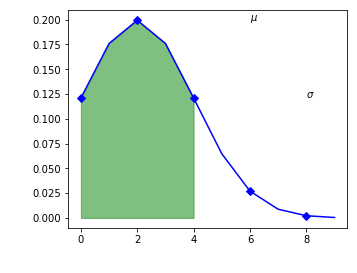

Populating the interactive namespace from numpy and matplotlib


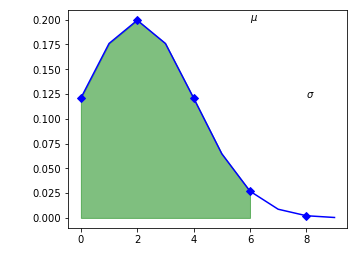

Populating the interactive namespace from numpy and matplotlib


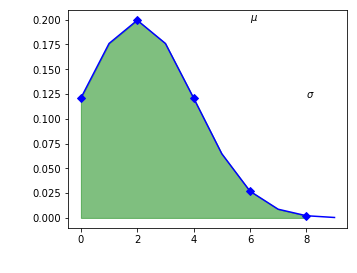

Populating the interactive namespace from numpy and matplotlib


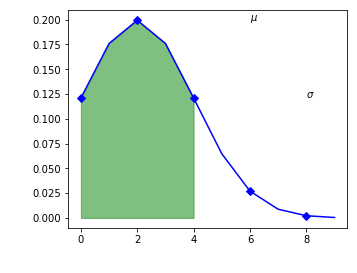

Populating the interactive namespace from numpy and matplotlib


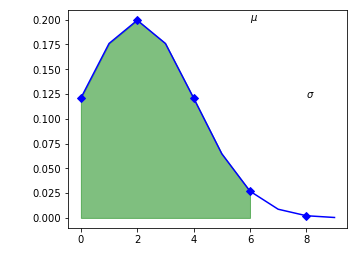

Populating the interactive namespace from numpy and matplotlib


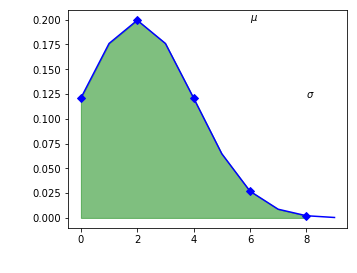

Populating the interactive namespace from numpy and matplotlib


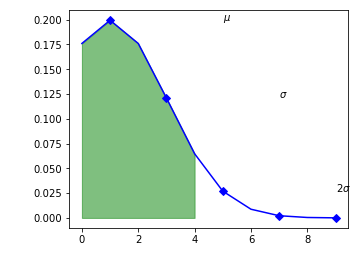

Populating the interactive namespace from numpy and matplotlib


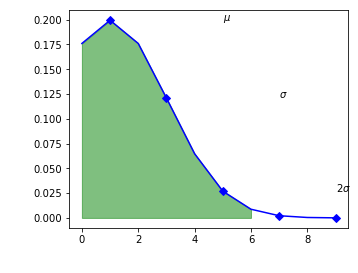

Populating the interactive namespace from numpy and matplotlib


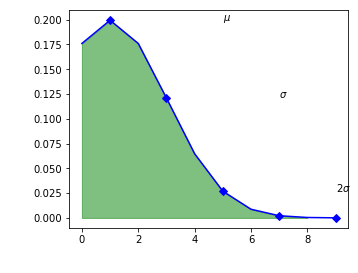

Populating the interactive namespace from numpy and matplotlib


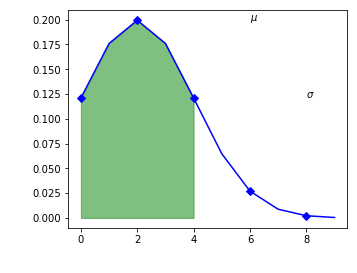

Populating the interactive namespace from numpy and matplotlib


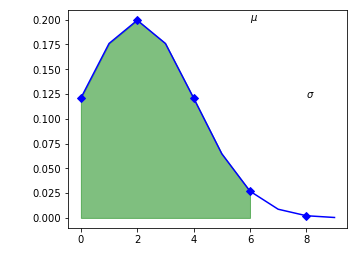

Populating the interactive namespace from numpy and matplotlib


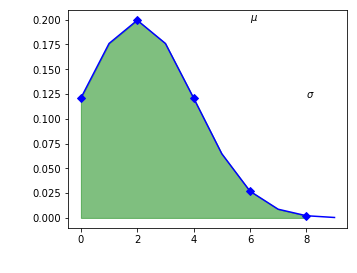

In [11]:

### FMC1 z-score 1 unidade
z_score(5,fmc_1_mean_unidade_1, fmc_1_standard_deviation_unidade_1)
z_score(7,fmc_1_mean_unidade_1, fmc_1_standard_deviation_unidade_1)
z_score(9,fmc_1_mean_unidade_1, fmc_1_standard_deviation_unidade_1)

### FMC1 z-score 2 unidade
z_score(5,fmc_1_mean_unidade_2, fmc_1_standard_deviation_unidade_2)
z_score(7,fmc_1_mean_unidade_2, fmc_1_standard_deviation_unidade_2)
z_score(9,fmc_1_mean_unidade_2, fmc_1_standard_deviation_unidade_2)

### FMC1 z-score 3 unidade
z_score(5,fmc_1_mean_unidade_3, fmc_1_standard_deviation_unidade_3)
z_score(7,fmc_1_mean_unidade_3, fmc_1_standard_deviation_unidade_3)
z_score(9,fmc_1_mean_unidade_3, fmc_1_standard_deviation_unidade_3)

### FMC1 z-score media final
z_score(5,fmc_1_mean_media_final, fmc_1_standard_deviation_media_final)
z_score(7,fmc_1_mean_media_final, fmc_1_standard_deviation_media_final)
z_score(9,fmc_1_mean_media_final, fmc_1_standard_deviation_media_final)

Populating the interactive namespace from numpy and matplotlib


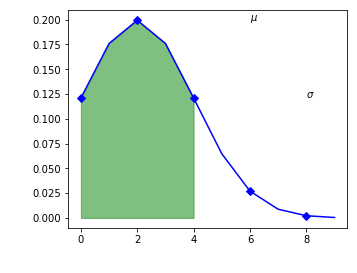

Populating the interactive namespace from numpy and matplotlib


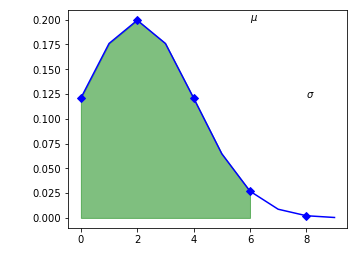

Populating the interactive namespace from numpy and matplotlib


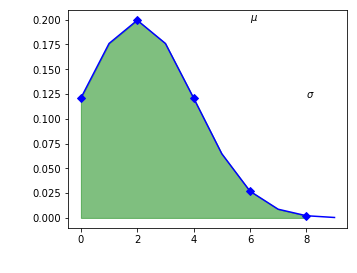

Populating the interactive namespace from numpy and matplotlib


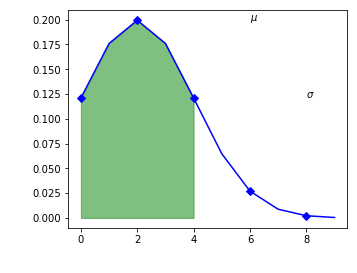

Populating the interactive namespace from numpy and matplotlib


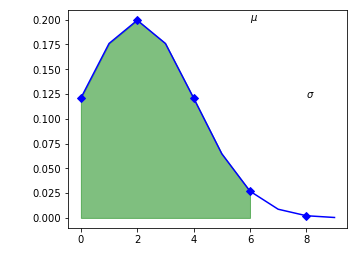

Populating the interactive namespace from numpy and matplotlib


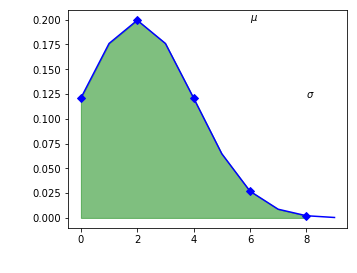

Populating the interactive namespace from numpy and matplotlib


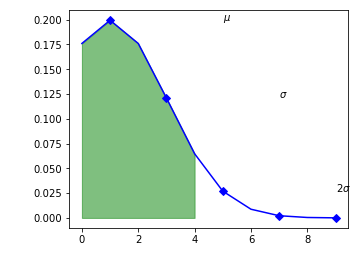

Populating the interactive namespace from numpy and matplotlib


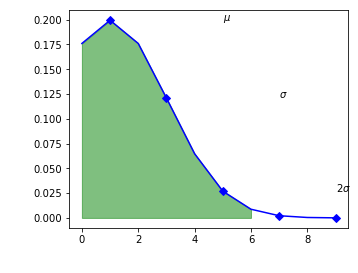

Populating the interactive namespace from numpy and matplotlib


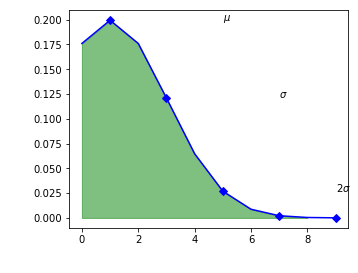

Populating the interactive namespace from numpy and matplotlib


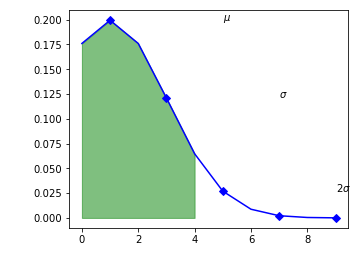

Populating the interactive namespace from numpy and matplotlib


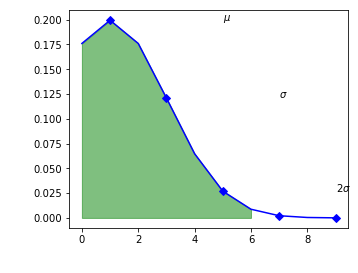

Populating the interactive namespace from numpy and matplotlib


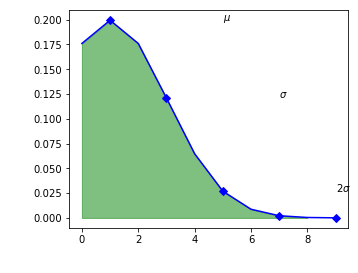

In [12]:
### FMC2 z-score 1 unidade
z_score(5,fmc_2_mean_unidade_1, fmc_2_standard_deviation_unidade_1)
z_score(7,fmc_2_mean_unidade_1, fmc_2_standard_deviation_unidade_1)
z_score(9,fmc_2_mean_unidade_1, fmc_2_standard_deviation_unidade_1)

### FMC2 z-score 2 unidade
z_score(5,fmc_2_mean_unidade_2, fmc_2_standard_deviation_unidade_2)
z_score(7,fmc_2_mean_unidade_2, fmc_2_standard_deviation_unidade_2)
z_score(9,fmc_2_mean_unidade_2, fmc_2_standard_deviation_unidade_2)

### FMC2 z-score 3 unidade
z_score(5,fmc_2_mean_unidade_3, fmc_2_standard_deviation_unidade_3)
z_score(7,fmc_2_mean_unidade_3, fmc_2_standard_deviation_unidade_3)
z_score(9,fmc_2_mean_unidade_3, fmc_2_standard_deviation_unidade_3)

### FMC2 z-score media final
z_score(5,fmc_2_mean_media_final, fmc_2_standard_deviation_media_final)
z_score(7,fmc_2_mean_media_final, fmc_2_standard_deviation_media_final)
z_score(9,fmc_2_mean_media_final, fmc_2_standard_deviation_media_final)

Populating the interactive namespace from numpy and matplotlib


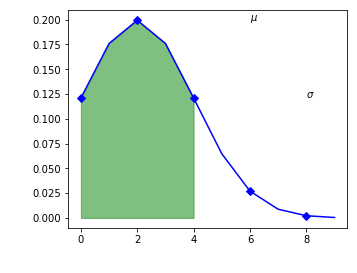

Populating the interactive namespace from numpy and matplotlib


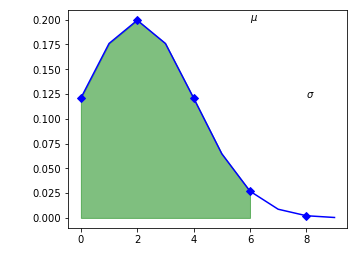

Populating the interactive namespace from numpy and matplotlib


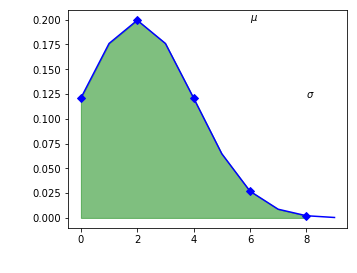

Populating the interactive namespace from numpy and matplotlib


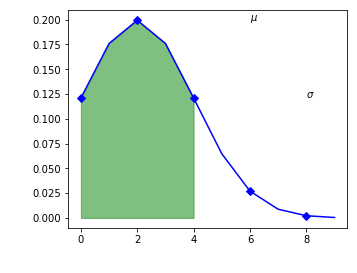

Populating the interactive namespace from numpy and matplotlib


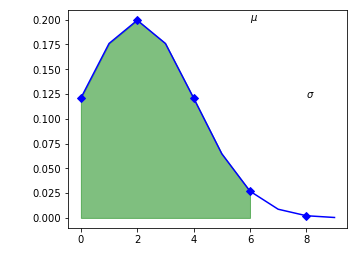

Populating the interactive namespace from numpy and matplotlib


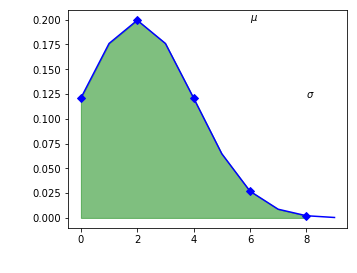

Populating the interactive namespace from numpy and matplotlib


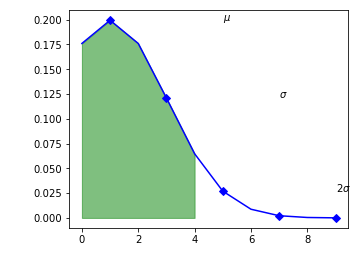

Populating the interactive namespace from numpy and matplotlib


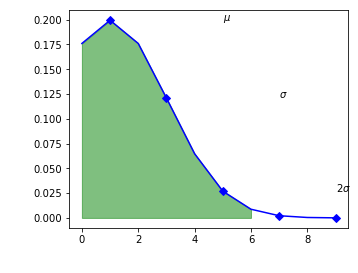

Populating the interactive namespace from numpy and matplotlib


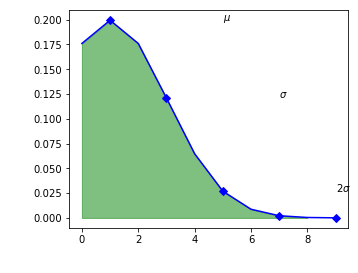

Populating the interactive namespace from numpy and matplotlib


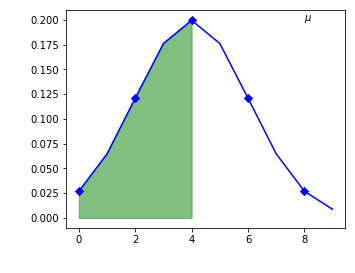

Populating the interactive namespace from numpy and matplotlib


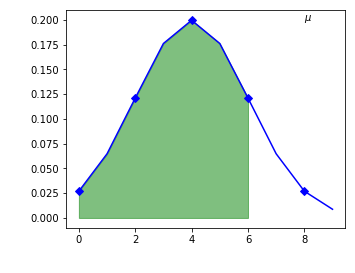

Populating the interactive namespace from numpy and matplotlib


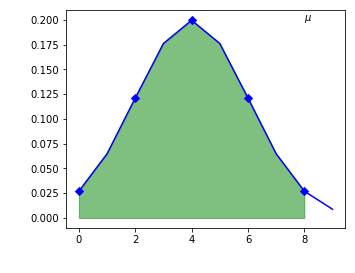

In [13]:
### Probabilidade z-score 1 unidade
z_score(5,prob_mean_unidade_1, prob_standard_deviation_unidade_1)
z_score(7,prob_mean_unidade_1, prob_standard_deviation_unidade_1)
z_score(9,prob_mean_unidade_1, prob_standard_deviation_unidade_1)

### Probabilidade z-score 2 unidade
z_score(5,prob_mean_unidade_2, prob_standard_deviation_unidade_2)
z_score(7,prob_mean_unidade_2, prob_standard_deviation_unidade_2)
z_score(9,prob_mean_unidade_2, prob_standard_deviation_unidade_2)

### Probabilidade z-score 3 unidade
z_score(5,prob_mean_unidade_3, prob_standard_deviation_unidade_3)
z_score(7,prob_mean_unidade_3, prob_standard_deviation_unidade_3)
z_score(9,prob_mean_unidade_3, prob_standard_deviation_unidade_3)

### Probabilidade z-score media final
z_score(5,prob_mean_media_final, prob_standard_deviation_media_final)
z_score(7,prob_mean_media_final, prob_standard_deviation_media_final)
z_score(9,prob_mean_media_final, prob_standard_deviation_media_final)